In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time

In [6]:
def sigmoid(alpha):
    return 1/(1+np.exp(-alpha))
def accuracy(scores,ytrain):
    predclass = np.argmax(scores,axis=0)
    trueclass = np.argmax(ytrain,axis=0)
    return (np.sum(predclass==trueclass)/trueclass.size)

In [11]:
def reLU(alpha):
  return np.maximum(0,alpha)

def reLUprime(alpha):
  return np.greater(0,alpha)

In [14]:
w_1.shape

(100, 785)

In [13]:
reLUprime(w_1).shape

(100, 785)

In [38]:
#using the previous loadded data set cifar10, reshaped, biasing added
#200 neurons,
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
#Din = 3072 # CIFAR10
Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)                   #normalizing
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K).T
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K).T
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_train = np.insert(x_train,Din,np.zeros((60000,)),axis=1).T # add zeros to include the biasing trick 3073 x 50000
x_test = x_test.astype('float32')
x_test = np.insert(x_test,Din,np.zeros((10000,)),axis=1).T
std=1e-5
batchsize = 500
H =100                              #hidden nodes (neurons)
w_1 = std*np.random.randn(H, Din+1) # biasing trick 200x3073 matrix
w_2 = std*np.random.randn(K, H)     # 10x200 matrix
epochs = 300    
lr = 0.025    
lr_decay= 0.975
reg =  5e-5
loss_history2 = []
train_acc_history2 = []
val_acc_history2 = []
val_loss_history2 = []
seed = 0
rng = np.random.default_rng(seed=seed)
# create random batches per iteration
iteration =0
epoch =0

x_train:  (60000, 28, 28)


In [39]:
t1 = time.time()
while epoch < epochs:
    # calculate P1s , send through activation function and get ys, calculate p2s using w_2, calculate loss, get gradient, do gradient descent
    indices = np.arange(Ntr)    #shuffling images each epoch
    rng.shuffle(indices)
    X = x_train[:,indices]
    Y_tr = y_train[:,indices]
    #calculate P1s
    P1 = w_1.dot(X)    #P1 200Xbatchsize
    y = sigmoid(P1)    #ys
    #y = reLU(P1)
    P2 = w_2.dot(y)    #P2, in this case outputs,no activation 10xbatchsize
    #explicit implementation of loss
    L = (1./Ntr)*((np.square(P2-Y_tr)).sum() + reg*(np.sum(w_1**2)+np.sum(w_2**2)))
    #explicit calculation of the two gradients 
    #PARTIAL DERIVATIVE WRT W2
    dL_dP2 = (1./Ntr)*2.0*(P2-Y_tr)
    dP2_dw2 = y.T
    dL_dw2 = dL_dP2.dot(dP2_dw2) + reg*w_2  #pfffttt 
    #PARTIAL DERIVATIVE WRT W1
    dP2_dy = w_2
    dy_dP1 = y*(1-y)
    #dy_dP1 = reLUprime(P1)
    dP1_dw1= X
    dL_dw1 = np.multiply(((dP2_dy.T).dot(dL_dP2)),dy_dP1).dot(dP1_dw1.T)  +reg*w_1    #aaaaaaaaaaaaaaa
    w_1 += -lr*dL_dw1
    w_2 += -lr*dL_dw2
    lr *= lr_decay
    loss_history2.append(L)
    train_acc_history2.append(accuracy(P2, Y_tr))
        
    #validation

    valP1 = w_1.dot(x_test)    
    val_y = sigmoid(valP1)    
    #val_y = reLU(valP1)
    valP2 = w_2.dot(val_y)
    valL = (1./10000)*((np.square(valP2-y_test)).sum() + reg*(np.sum(w_1**2)+np.sum(w_2**2)))
    val_loss_history2.append(valL)
    val_acc_history2.append(accuracy(valP2, y_test))
        
    print('epoch:{}, loss: {}, train_acc: {}, validation_loss: {}, validation_acc: {}'.format(epoch,loss_history2[epoch],train_acc_history2[epoch],val_loss_history2[epoch],val_acc_history2[epoch]))
    epoch+=1
t2 = time.time()
print('Execution time : ',t2-t1)

epoch:0, loss: 1.0000346422878799, train_acc: 0.09751666666666667, validation_loss: 0.9059410673924382, validation_acc: 0.1135
epoch:1, loss: 0.9059746332896375, train_acc: 0.11236666666666667, validation_loss: 0.9008823695169977, validation_acc: 0.1135
epoch:2, loss: 0.9008377166954968, train_acc: 0.11236666666666667, validation_loss: 0.9103856886759597, validation_acc: 0.1135
epoch:3, loss: 0.9102425384172598, train_acc: 0.11236666666666667, validation_loss: 0.9491746535380365, validation_acc: 0.098
epoch:4, loss: 0.948511885446246, train_acc: 0.09871666666666666, validation_loss: 0.9275124209653914, validation_acc: 0.1135
epoch:5, loss: 0.9285722743339077, train_acc: 0.11236666666666667, validation_loss: 0.9099117553486739, validation_acc: 0.2782
epoch:6, loss: 0.9101711093190599, train_acc: 0.27821666666666667, validation_loss: 0.860637633643195, validation_acc: 0.234
epoch:7, loss: 0.8626190844740441, train_acc: 0.23478333333333334, validation_loss: 0.8065567801669219, validation_

In [43]:
np.amax(w_2)

0.03966799521878954

In [44]:
w_1.T.shape

(785, 100)

In [45]:
w_2.T.shape

(100, 10)

In [49]:
height = 100
width =10
with open("W2.txt" ,"w+" )as file:
    W1 = w_2.T
    file.write("{")
    for i in range(height):
        file.write("{")
        for j in range(width):
            if j==width-1:
                file.write(str(W1[i][j]))
            else:
                file.write(str(W1[i][j]))
                file.write(",")
        file.write("},")

In [20]:
x_test[:,0].shape

(785,)

In [54]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
x_test = np.reshape(x_test,(Nte,Din))

In [55]:
x_test = np.insert(x_test,Din,np.zeros((10000,)),axis=1).T

In [50]:
temp = x_test[:,1]
with open("image.txt","w+") as file:
  file.write("{")
  for i in range(785):
    if i ==784:
      file.write(str(temp[i]))
      file.write("}")
    else:  
      file.write(str(temp[i]))
      file.write(",")


In [55]:
temp = np.delete(temp, 784)

In [56]:

image = np.reshape(temp,(28,28))

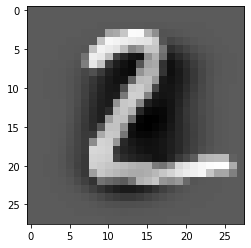

In [57]:
plt.imshow(image,'gray')

In [57]:
P1 = w_1.dot(x_test[:,1])    #P1 200Xbatchsize
y = sigmoid(P1)    #ys
P2 = w_2.dot(y)

In [58]:
print(P2)

[ 0.19013278 -0.10137853  0.21697459  0.28671252 -0.12292113  0.19689055
  0.14057958 -0.06545267  0.1646671  -0.106307  ]


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype("float32")/255.0   # normalize
x_test = x_test.astype("float32")/255.0     # normalize
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)

170500096/170498071 [==============================] - 2s 0us/step


In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, 3, padding="valid", activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(16, 3, activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10),
    ]
)
print(model.summary())
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.SGD(learning_rate=0.002,momentum=0.0001, name='SGD'),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=50, epochs=200, verbose=2,validation_data=(x_test,y_test))
#model.evaluate(x_test, y_test, batch_size=50, verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 16)          9232      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               